<a href="https://colab.research.google.com/github/Harshpatel44/ML-A2/blob/master/A2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

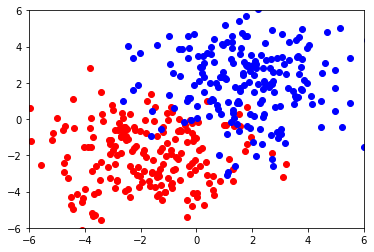

In [0]:
import matplotlib.pyplot as plt
def design1():
    #data 1
    mean1 = [-2,-2]
    cov1= [[3.5,0],[0,3.5]]
    x1, y1 = np.random.multivariate_normal(mean1, cov1, 200).T

    #data 2
    mean2 = [2,2]
    cov2= [[3.5,0.0],[0.0,3.5]]
    x2, y2 = np.random.multivariate_normal(mean2, cov2, 200).T

    plt.plot(x1, y1, 'ro',color='r')
    plt.plot(x2,y2,'ro',color='b')
    plt.axis([-6,6,-6,6])
    plt.show()
design1()

Taking covariance as [0.4,0][0,0.4] for noise 0
<br>
0.4 to 3.5 is the noise range

In [0]:
import matplotlib.pyplot as plt

for i in np.arange(0.5,4,0.1):
  #data 1
  mean1 = [-2,-2]
  cov1= [[i,0],[0,i]]
  x1, y1 = np.random.multivariate_normal(mean1, cov1, 20).T

  #data 2
  mean2 = [2,2]
  cov2= [[i,0.0],[0.0,i]]
  x2, y2 = np.random.multivariate_normal(mean2, cov2, 20).T

  plt.plot(x1, y1, 'ro',color='r')
  plt.plot(x2,y2,'ro',color='b')
  plt.axis([-6,6,-6,6])
  plt.show()
  print(str(i))

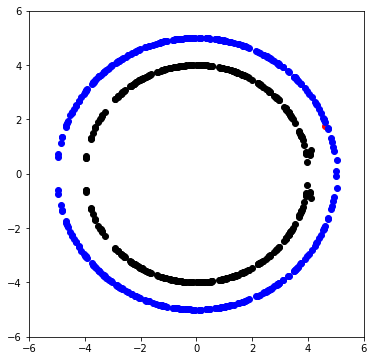

In [0]:
from matplotlib.pyplot import figure

def circle(radius,items):

    #creating random values for x
    #x=(2*radius+1)*np.random.uniform(items) - (radius+1)
    x = np.random.uniform(-radius,radius+0.1,items)
    #input()
    #applying circle equation to find y
    y=np.sqrt(np.abs(np.power(radius,2)-np.power(x,2) ))
    
    # print(x)
    # print(y)
    
    
    #appending x value again for correspondance with negative values of y. Hence appending negative values of y to y array.
    x=np.append(x,x)
    y=np.append(y,-y)

    # figure(figsize=(10,10))
    # plt.plot(x,y,'ro')    
    # plt.show()

    return x,y

x1,y1=circle(5,200)
x2,y2=circle(4,200)
#print(x1,x2)
plot_x= (np.maximum(x1,x2) - np.minimum(x1,x2)) * np.random.random_sample(400) - np.maximum(x1,x2)
plot_y= (np.maximum(y1,y2) - np.minimum(y1,y2)) * np.random.random_sample(400) - np.maximum(y1,y2)


plot_x = np.random.uniform(np.minimum(x1,x2),np.maximum(x1,x2),1)
plot_y = np.random.uniform(np.minimum(y1,y2),np.maximum(y1,y2),1)
#print(plot_x)

#mean1 = [(x1+x2)/2,(y1+y2)/2]
#cov1= [[i,0],[0,i]]
#x1, y1 = np.random.multivariate_normal(mean1, cov1, 20).T

  

#plotting

figure(figsize=(6,6))
plt.plot(plot_x,plot_y,'ro')
plt.plot(x1,y1,'ro',color='blue')
plt.plot(x2,y2,'ro',color='black')
plt.axis([-6,6,-6,6])
plt.show()



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def outer_circle(radius=5,items=130):
    a=np.random.random(items) * 2 * np.pi
    r = radius * np.sqrt(0.4*np.random.random(items)+0.6)
    x1 = r * np.cos(a)
    y1 = r * np.sin(a)
    return x1,y1

def inner_circle(radius=3,items=130):
    a=np.random.random(items) * 2 * np.pi
    r = radius * (np.sqrt(np.random.random(items)))
    x2 = r * np.cos(a) 
    y2 = r * np.sin(a)
    return x2,y2


x1,y1=outer_circle(5,200)
x2,y2=inner_circle(3,200)

d2_data=np.array([x1,y1,np.zeros(x1.shape)+1])
d2_data=(np.append(d2_data,[x2,y2,np.zeros(x2.shape)],axis=1)).T


In [0]:

def noise(data,noise):
    
    amt=int( np.round( data.shape[0]*( noise/100 ) ) )
    arr=np.random.randint(0,data.shape[0]/2,amt)
    data[arr,2]=0
    arr=np.random.randint(data.shape[0]/2,data.shape[0],amt)
    data[arr,2]=1

    return data
d2_data=noise(d2_data,100)

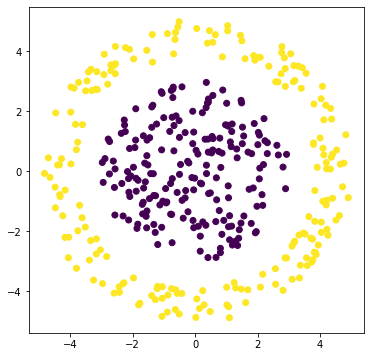

In [0]:
figure(figsize=(6,6))
plt.scatter(d2_data[:,0],d2_data[:,1],c=d2_data[:,2])
plt.show()

In [256]:
def active_func(type,z):
    if type=='relu':
      return np.maximum(0,z)
    if type=='sigmoid':
      return 1/(1+np.exp(-z))
b1=0
b2=0
def train(x,numInput,numHiddenUnits,numOutputs,activationType,numIter,b1,b2):
    
    
    #input layer items = 2
    #hidden layer items =2 
    #output layer items = 1

    
    #started with input layer
    w1=np.random.rand(2,2)
    z1=np.matmul(x[:,:2],w1) + b1
    h1=active_func('relu',z1)
    # reached to hidden layer 1
    w2=np.random.rand(2,1) 
    z2=np.matmul(h1,w2) + b2
    y=active_func('sigmoid',z2)
    t = x[:,2]
    loss=0.5*( np.power( np.abs(y-t),2 ) )



    def deriv_activ_fn(z):
      if(z<0):z=0
      else: z=1
      return z
    #backpropogation
    y_ = y-t
    w2_=np.matmul(y_,h1.T)
    b2_=y_
    h_=np.matmul(w2.T,y_)
    z_=h_ * deriv_activ_fn(z)
    w1_ = np.matmul(z_,x.T)
    b1_= z_
    
    w2 = w2 - w2_
    b2 = b2 - b2_
    w1 = w1 - w1_
    b1 = b1 - b1_
    


train(d2_data,2,1,2,'relu',10000,b1,b2)    

ValueError: ignored

In [0]:
np.maximum(2,5)

5